# Komponenten eines neuronalen Netzwerkes

<div style="padding: 5px; border: 5px solid #a10000ff;">

**Hinweis:** In den Codezellen sind jeweils einige Codeteile nicht programmiert. Diesen Code müssen Sie ergänzen. Die jeweiligen Stellen sind mit einem Kommentar und dem Keyword **TODO** vermerkt und z.T. Stellen mit ... markiert.

Ausserdem gibt es einige assert Statements. Diese geben einen Fehler aus, sollte etwas bei Ihrer Programmierung nicht korrekt sein.

## Perzeptronen

Perzeptronen sind künstliche Neuronen. Diese kommen in vielen neuronalen Netzwerken als kleinste Bausteine zum Einsatz.

Ein Perzeptron bimmt eine Anzahl von numerischen Inputs entgegen, multipliziert diese je mit einem Gewicht und bildet danach eine Summe aus diesen Ergebnissen. Darauf wird die Aktivierungsfunktion des Perzeptrons angewendet um die Ausgabe des Perzeptrons zu bestimmen. In der folgenden Darstellung wird dies grafisch dargestellt. Eine Beispielberechnung von Input bis Output folgt unterhalb dieser Zelle.

<img src="images/perzeptron_1.png" width="700px">



**Gewichte (Weights)**

Die Gewichte definieren, wie stark jeder Input (ein einzelnes Features) gewichtet wird und somit den Output des Perzeptrons beeinflusst. 
Das Perzeptron lernt diese Gewichte und passt diese anhand der Wichtigkeit für die Summe an.

**Bias**

Jedes Perzeptron hat noch einen Bias, welcher ein Gewicht darstellt, welches unabhängig vom Input ist und somit die Aktivierung unabhängig vom den Inputs steuern kann.

**Aktivierungsfunktion**

Die Aktivierungsfunktion entscheidet, wie stark der Output des Perzeptrons aufgrund des Ergebnisses der gewichteten Summe sein soll. Dies können kontinuierliche Outputs z.B. $[-1,1]$ sein oder auch diskrete (kategorische) -1 oder 1. 

Für die Aktivierungsfunktion gibt es verschiedene Varianten. In dem Beispiel oben wird die `sign()` Funktion genutzt.
Weitere Aktivierungsfunktionen sind zum Beispiel:

- $\text{Linear:} f(z)=z $
- $\text{Logistic (Sigmoid): } f(z)=\frac{1}{1+e^{-z}}$
- $\text{LeakyReLU: } f(z) =
\begin{cases}
z, & \text{if } z \ge 0 \\
\alpha x, & \text{if } z < 0
\end{cases}$

**Optional**:
Auf folgender Seite finden Sie Visualisierungen zu den Aktivierungsfunktionen:
https://www.geeksforgeeks.org/machine-learning/activation-functions-neural-networks/

<hr>

### Beispielberechnung

Ein Perzeptron hat zwei Inputs und somit zwei Gewichten und einem Bias. Genutzt wird die `sign()` Aktivierungsfunktion.





Für folgende Konfiguration und Inputs:

$x_1= 5$
$x_2= -2$

$w_0 (b) = -6$
$w_1 = 1$
$w_2 = -4$

Gewichtete Summe berechnen:

$ z =x_1 \cdot w_1 + x_2 \cdot w_2 + b = 5 \cdot 1 + (-2) \cdot (-4) + (-6) = 7$

Aktivierungsfunktion anwenden:

$ f(z) =\begin{cases}
1, & \text{if } z \ge 0 \\
-1, & \text{if } z < 0
\end{cases} = 1$ 


### Aufgabe 1
Schreiben Sie eine Funktion, welche ein simples Perzeptron mit zwei Inputs, zwei Gewichten und der Sign activation Funktion abbildet. Vervollständigen Sie dazu den folgenden Code. Die "*assert*" Statements generieren einen Fehler, sollte die Implementation nicht korrekt sein.

In [2]:
def activation_function(z):
    # TODO Implementieren Sie die sign-Aktivierungsfunktion
    if z >= 0:
        return 1
    elif z < 0:
        return -1

def perceptron(w1, w2, bias, x1, x2):
    # TODO Implementieren Sie den Output des Perzeptrons mit der gewichteten Summe und der Aktivierungsfunktion
    z = w1 * x1 + w2 * x2 + bias
    return activation_function(z)


assert activation_function(3) == 1, "Testfall 1 für Aktivierungsfunktion fehlgeschlagen"
assert activation_function(-2) == -1, "Testfall 2 für Aktivierungsfunktion fehlgeschlagen"
assert activation_function(0) == 1, "Testfall 3 für Aktivierungsfunktion fehlgeschlagen"
assert perceptron(1, -4, -6, 5, -2) == 1, "Testfall 1 für Perzeptron fehlgeschlagen"



### Lernalgorithmus Perzeptron

**Optional:**

Die Gewichte haben wir hier als gegeben genommen. In der Realität würden diese jedoch von Trainingsdaten gelernt werden. Wir schauen uns in diesem Kurs den Lernalgorithmus des Perzeptrons nicht an, da dies in heutigen neuronalen Netzerken nicht mehr anhand des alten Algorithmus geschieht. Sollten Sie trotzdem daran interessiert sein, können Sie hier unter Working genauer nachlesen, wie nun die Gewichte aktualisiert werden: https://www.geeksforgeeks.org/machine-learning/what-is-perceptron-the-simplest-artificial-neural-network/ 

## Verschiedene Netzwerke vergleichen

Wir möchten uns nun anschauen wie sich unterschiedliche Netzwerke anhand eines Klassifikationsproblems verhalten. Dabei achten wir vor allem auf die Bildung der Decision Boundary.

Lassen Sie die folgene Zelle laufen um die Funktionen zu importieren.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Single Perzeptron

Wir betrachten nun einmal ein künstliches Klassifikationsproblem. Dabei sollen die Datenpunkte in zwei unterschiedliche Klassen unterteilt werden. Dazu wird ein neues Dataset generiert mit 100 Datenpunkten. Je 50 Datenpunkte pro Klasse.

### Dataset generieren und visualisieren

Die folgende Funktion erstellt ein Dataset, welches linear separierbar ist. Das bedeutet, es kann durch eine lineare Decision Boundary fehlerlos unterteilt werden. Lassen Sie die folgende Zelle laufen.

In [4]:
# create a linearly separable dataset with two features and two classes
def create_linearly_separable_data(num_samples_per_class=50):
    np.random.seed(0)  # for reproducibility
    class_0 = np.random.randn(num_samples_per_class, 2) + np.array([-2, -2])
    class_1 = np.random.randn(num_samples_per_class, 2) + np.array([2, 2])
    data = np.vstack((class_0, class_1))
    labels = np.array([0]*num_samples_per_class + [1]*num_samples_per_class)
    return data, labels

Die Daten sehen wie folgt aus.

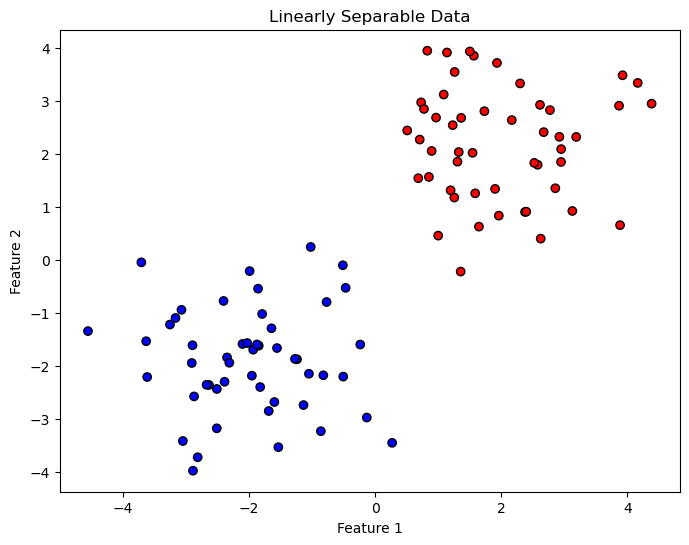

In [5]:
# TODO Visualisieren Sie die Datenpunkte in einem Scatter-Plot
data, labels = create_linearly_separable_data()
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='bwr', edgecolor='k')
plt.title('Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### Perzeptron und Lernalgorithmus

In der folgenden Zelle wurde das Perzeptron mittels Vektoroperationen programmiert.
Aussserdem ist der Lernalgorithmus und die Visualisierung des Datasets inklusive Decision Boundary für ein Perzeptron implementiert. 
Lassen Sie die Zelle laufen damit die Funktionen registriert werden.


In [6]:
# perceptron function using vectorized operations
def perceptron_step(weight_vector, bias, input_vector):
    weighted_sum = np.dot(weight_vector, input_vector) + bias
    return 1 if weighted_sum >= 0 else 0

# Lernalgorithmus für das Perzeptron
# X: input data, y: labels, learning_rate: step size, epochs: number of iterations
def train_perceptron(X, y, learning_rate=0.1, epochs=10):
    num_features = X.shape[1]
    weights = np.zeros(num_features)
    bias = 0

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            prediction = perceptron_step(weights, bias, X[i])
            error = y[i] - prediction
            weights += learning_rate * error * X[i]
            bias += learning_rate * error
    return weights, bias

#plot in a scatter plot the data points with different colors for the two classes
def plot_data_with_perc(X, y, weights=None, bias=None, title='Linearly Separable Data'):
    if weights is not None and bias is not None:
        # create a grid to plot the decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        Z = np.array([perceptron_step(weights, bias, np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# evaluate the perceptron on the test set
def evaluate_perceptron(X, y, weights, bias):
    correct_predictions = 0
    for i in range(X.shape[0]):
        prediction = perceptron_step(weights, bias, X[i])
        if prediction == y[i]:
            correct_predictions += 1
    accuracy = correct_predictions / X.shape[0]
    return accuracy

In [7]:
X_1, y_1 = create_linearly_separable_data()

print("Dimensionen der Datenpunkte X_1:", X_1.shape)
print("Dimensionen der Labels y_1:", y_1.shape)



Dimensionen der Datenpunkte X_1: (100, 2)
Dimensionen der Labels y_1: (100,)


Test set accuracy: 1.0


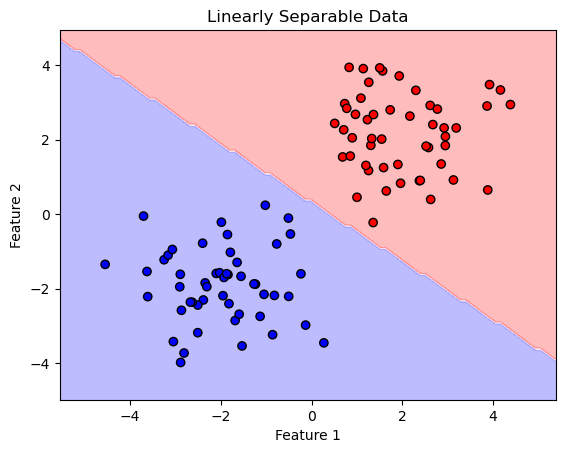

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# train the perceptron
weights, bias = train_perceptron(X_train, y_train, learning_rate=0.1, epochs=20)

accuracy = evaluate_perceptron(X_test, y_test, weights, bias)

print("Test set accuracy:", accuracy)

plot_data_with_perc(X_1, y_1, weights, bias)



**Bemerkung:** Die Decision Boundary wäre eigentlich linear und gerade, wird jedoch aufgrund der Methode wie Sie plotted wird fälschlicherweise mit kleinen Stufen dargestellt.

## Multilayer Perzeptron (MLP)

Wir haben gesehen, dass das Perzeptron eine gerade Decision Boundary lernt. In heutigen neuronalen Netzwerken kommen sehr viele Perzeptronen oder künstliche Neuronen zum Einsatz. Die Perzeptronen haben dabei gleich wie vorhin behandelt Gewichte, einen Bias, die gewichtete Summe und eine Aktivierungsfunktion. Die Perzeptronen in Layern also Schichten hintereinander geschaltet. Normalerweise sind die Neuronen von zwei angrenzenden Schichten alle miteinander je verbunden.
Beispiel:

<img src="images/mlp1.png" width="700px">

*Quelle: ibm.com*

Dabei hat jedes Perzeptron selbst so viele Gewichte wie Verbindungen bei ihm eingehen. Zum Beispiel wird dann der Output des Perceptrons P1 beim Perzeptrons P3 mit einem Gewicht multipliziert.


<img src="images/mlp2.png" width="700px">

In der nächsten Aufgabe sollen Sie unterschiedliche Aktivierungsfunktionen testen und deren Auswirkung beobachten.

### Aufgabe 2
In der folgenden Zelle ist ein MLP Klassifikationsmodell aus der Library Scikit-Learn implementiert und zusammen mti der Visualisierung.

**Frage**
Halten Sie fest, wie sich die Decision Boundary ändert, wenn Sie die Aktivierungsfunktion anpassen:

> identity: gerade
> relu: stark gebogen
> logistic: leicht gebogen
> tanh: S-Form

- identity:
- relu:
- logistic:
- tanh:

MLP Test set accuracy: 1.0


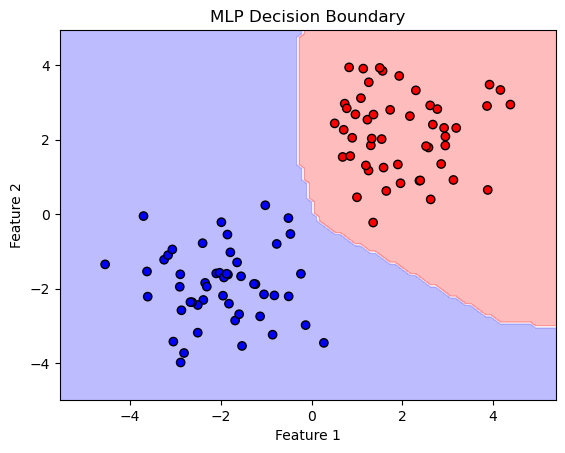

In [9]:
# Set up a Multilayer Perceptron to demonstrate non-linearity

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(4,), activation='relu', max_iter=2000, random_state=41)
mlp.fit(X_train, y_train)
mlp_accuracy = mlp.score(X_test, y_test)
print("MLP Test set accuracy:", mlp_accuracy)

# plot decision boundary for MLP
def plot_mlp_decision_boundary(mlp, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.title('MLP Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_mlp_decision_boundary(mlp, X_1, y_1)


## XOR-Problem
Wir haben gesehen, dass die Aktivierungsfunktion einen grossen Einfluss auf den Output haben kann.

In den 1960er Jahren herrschte grosser Optimismus gegenüber Künstlicher Intelligenz. Ein zentrales Modell dieser Zeit war das Perzeptron, ein einfacher neuronaler Klassifikator. Dieser konnte jedoch nur linear separierbare Probleme lösen.

Das XOR-Problem (Exklusives Oder) zeigte eine fundamentale Schwäche dieses Ansatzes: Die XOR-Funktion ist nicht linear separierbar. Das bedeutet, dass kein einzelnes Perzeptron eine Entscheidungsgrenze finden kann, um XOR korrekt zu klassifizieren.
Zur Erinnerung, XOR hat folgende Wahrheisttabelle:

| A | B | A XOR B |
|---|---|---------|
| 0 | 0 |    0    |
| 0 | 1 |    1    |
| 1 | 0 |    1    |
| 1 | 1 |    0    |

Wenn Sie die folgende Code-Zelle laufen lassen, sehen Sie noch eine Grafik des XOR-Problems und dass es keine lineare decision Boundary gibt, welche die Klassen fehlerlos trennt.

1969 wiesen Marvin Minsky und Seymour Papert in ihrem Buch “Perceptrons” nach, dass Perzeptronen diese Fähigkeit fehlt. Da zu dieser Zeit mehrschichtige neuronale Netze und effektive Trainingsmethoden wie Backpropagation noch nicht etabliert waren, wurde daraus der (falsche) Schluss gezogen, dass neuronale Netze grundsätzlich stark limitiert seien.

Diese Erkenntnis führte zu massivem Vertrauensverlust, gekürzten Forschungsgeldern und stagnierender Entwicklung im Bereich neuronaler Netze – eine Phase, die heute als AI Winter bezeichnet wird.

Erst in den 1980er Jahren, mit der Wiederentdeckung von mehrschichtigen Netzen und Backpropagation, konnte das XOR-Problem erfolgreich gelöst werden, was den Grundstein für das moderne Deep Learning legte.

Wir möchten nun das XOR Problem betrachten.

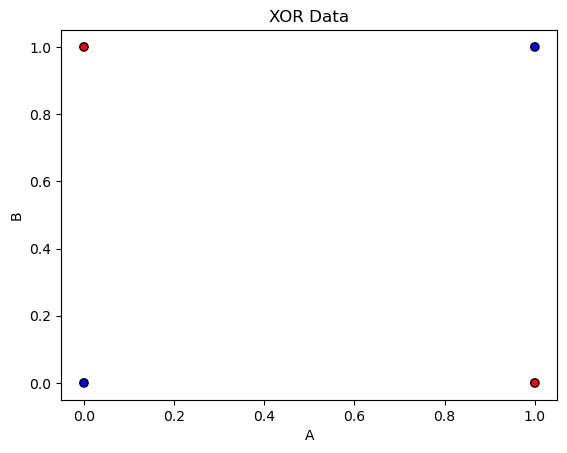

In [10]:
xor_x, xor_y = np.array([[0,0],[0,1],[1,0],[1,1]]), np.array([0,1,1,0])
fig, ax = plt.subplots()
ax.scatter(xor_x[:,0], xor_x[:,1], c=xor_y, cmap='bwr', edgecolors='k')
ax.set_title('XOR Data')
ax.set_xlabel('A')
ax.set_ylabel('B')
plt.show()

Wir interpretieren nun die obigen Werte für A und B als zwei Input Features und den Wert A XOR B als Label. 
Nun möchten wir untersuchen ob und mit welcher Aktivierungsfunktion, MLPs dieses Problem lösen können. Dazu generieren wir einige Datenpunkte im XOR Muster, damit das Modell genug Daten hat um zu lernen. Lassen Sie die folgende Zelle laufen.


In [11]:
# create a non-linearly separable dataset (XOR problem)
def create_xor_data(num_samples_per_quadrant=25):
    np.random.seed(0)  # for reproducibility
    class_0 = np.random.randn(num_samples_per_quadrant, 2) + np.array([-2.2, -2.2])
    class_1 = np.random.randn(num_samples_per_quadrant, 2) + np.array([2.2, 2.2])
    class_2 = np.random.randn(num_samples_per_quadrant, 2) + np.array([-2.2, 2.2])
    class_3 = np.random.randn(num_samples_per_quadrant, 2) + np.array([2.2, -2.2])
    data = np.vstack((class_0, class_1, class_2, class_3))
    labels = np.array([0]*num_samples_per_quadrant + [0]*num_samples_per_quadrant +
                      [1]*num_samples_per_quadrant + [1]*num_samples_per_quadrant)
    return data, labels
X_2, y_2 = create_xor_data()



### Aufgabe 3

Testen Sie wieder die vier Aktivierungsfunktionen aus.
Mit welchen ist das MLP fähig die Daten zu separieren?

- identity:
- relu
- logistic:
- tanh: 

Wie scheint sich ein MLP mit identity Aktivierungsfunktion zu verhalten?
> Immer noch wie ein einzelnes Perzeptron da die Decision Boundary immer noch linear ist.

> identity: nein, immer noch eine gerade boundary
> relu: funktioniert
> logistic: funktioniert
> tanh: funktioniert

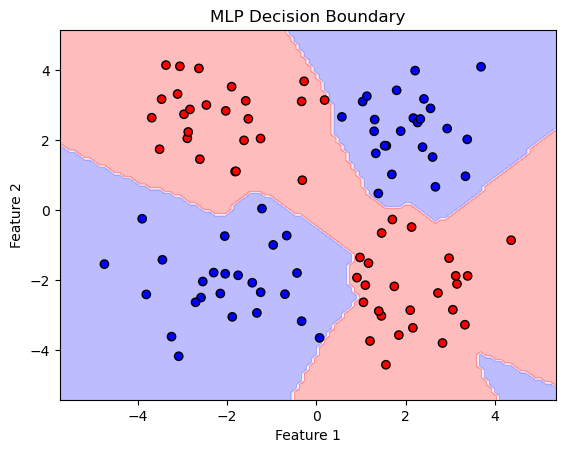

In [12]:
# Einige Datenpunkte im XOR-Muster hinzufügen

mlp_xor = MLPClassifier(hidden_layer_sizes=(10,), activation='tanh', solver='lbfgs', max_iter=200, random_state=42)
mlp_xor.fit(X_2, y_2)
plot_mlp_decision_boundary(mlp_xor, X_2, y_2)


## Kontrollfragen: Perzeptron und MLPs

**Kontrollfrage 1**

Ein Perzeptron hat drei Inputs. Wie viele lernbare Gewichte besitzt es?
>Ein Perzeptron mit drei Inputs besitzt 4 lernbare Gewichte. Für jeden Input eines plus den Bias.

**Kontrollfrage 2**

Beschreiben Sie das XOR-Problem in eigenen Worten und weshalb ein einzelnes Perzeptron dieses nicht lösen kann.
>Das XOR-Problem gibt nur dann 1 aus, wenn genau einer der beiden Inputs 1 ist.Ein einzelnes Perzeptron kann es nicht lösen, da XOR nicht linear separierbar ist und ein Perzeptron nur lineare Decision Boundary lernen kann.

**Kontrollfrage 3**

Ein MLP besitzt einen Inputlayer mit 5 Inputs. Es hat einen Hidden-Layer mit 10 künstlichen Neuronen und dann einen Output Layer mit einem Output.
Wie viele lernbare Gewichte gibt es im ganzen MLP?
> 10 Verbindungen pro Input = 50, 10 Verbindungen vom Hidden Layer zum Output, 10 Bias pro Neuron im Hidden Layer, 1 Bias im Output Layer= 71